<a href="https://colab.research.google.com/github/josejulianhidayat/Clustering_dan_Klasifikasi-marketing_campaign/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_JoseJulianHidayat_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**PENYELESAIAN**

1. Dataset yang digunakan harus tanpa label: Dataset yang diunggah memenuhi syarat karena tidak memiliki kolom target/kelas.

2. Jumlah baris minimal 1000 baris: Dataset ini memiliki 2240 baris, memenuhi kriteria jumlah baris.

3. Mengandung data kategorikal dan numerikal: Kolom kategorikal yang dapat digunakan: Education, Marital_Status. olom numerikal yang dapat digunakan: Income, Recency, dll.

4. Pembatasan: Dataset yang digunakan tidak berasal dari latihan sebelumnya Dataset ini baru diunggah dan memenuhi pembatasan tersebut.

Kesimpulan: Dataset sudah sesuai dengan kriteria keberhasilan untuk tahapan pengenalan dataset.

Kolom yang akan digunakan untuk analisis selanjutnya adalah:

Kategorikal: Education.
Numerikal: Income.
Langkah selanjutnya adalah mempersiapkan dataset untuk proses clustering.








# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset ke dalam DataFrame
file_path = 'marketing_campaign.csv'  # Ganti dengan lokasi file dataset Anda
dataset = pd.read_csv(file_path, delimiter=';')

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(dataset.info())

# Menampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
print(dataset.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWine

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Beberapa Baris Pertama Dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

<ipython-input-9-2dfa9f81470a>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)


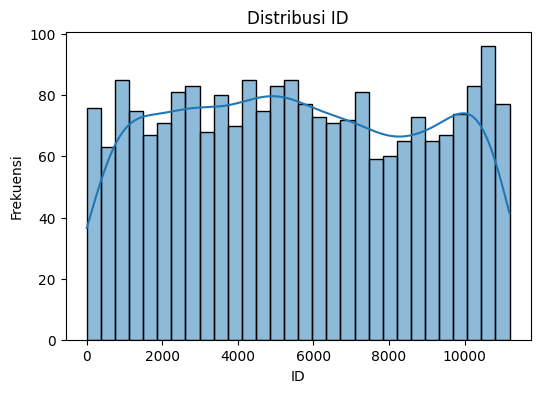

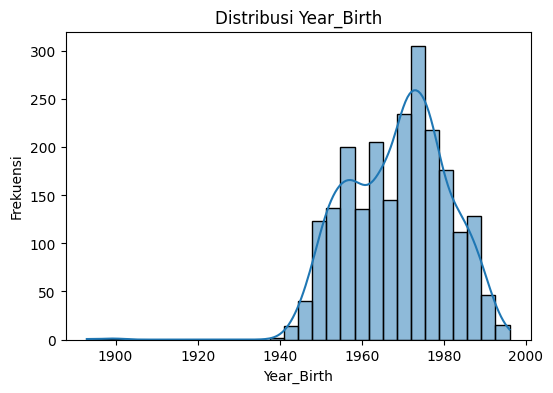

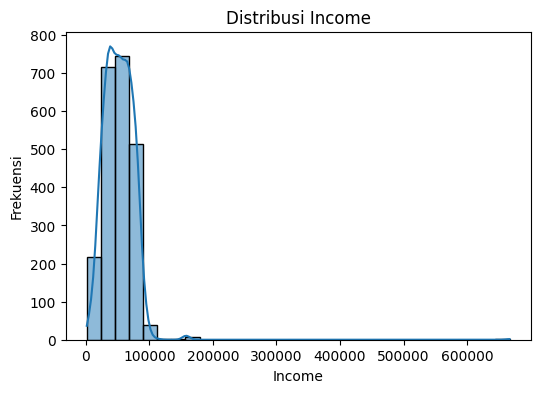

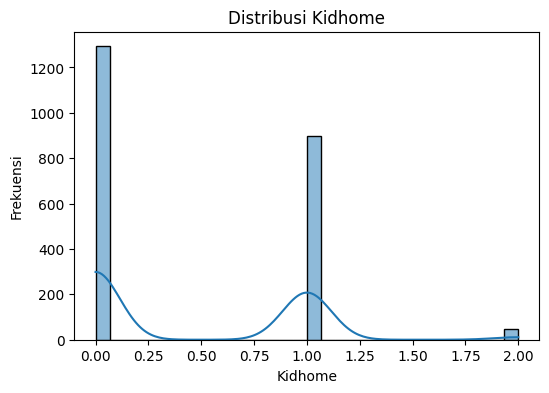

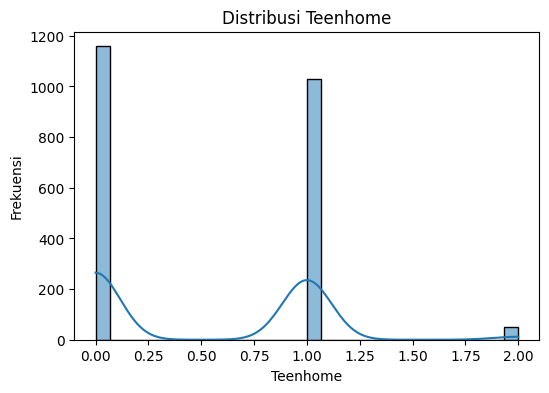

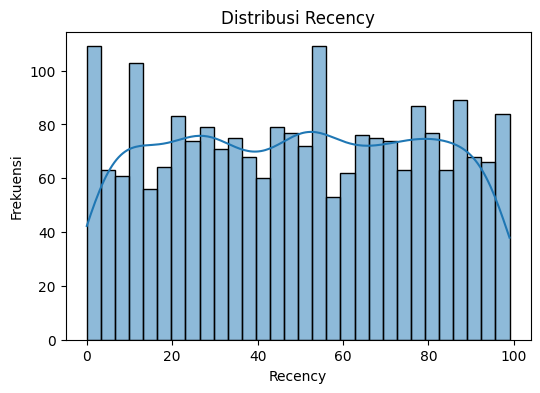

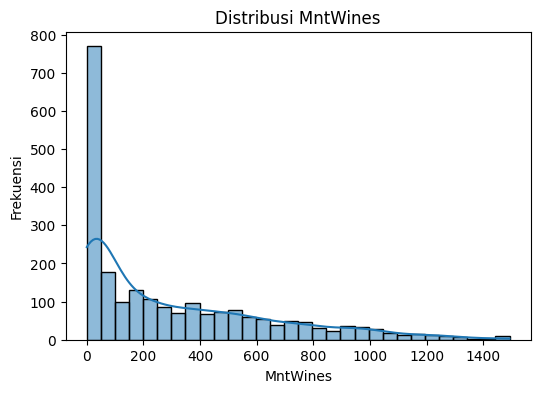

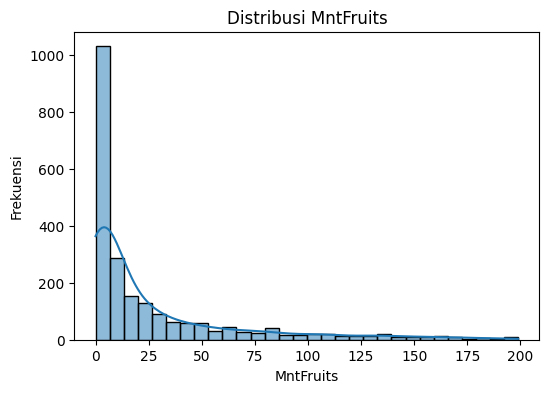

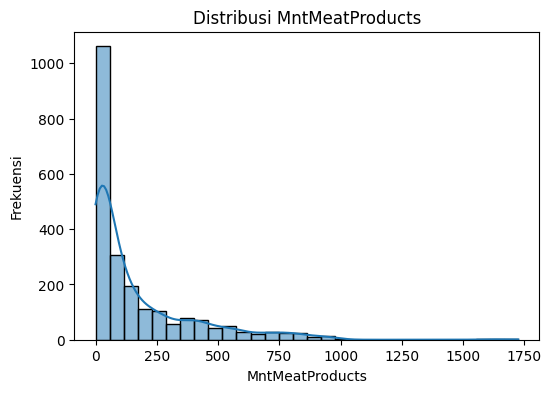

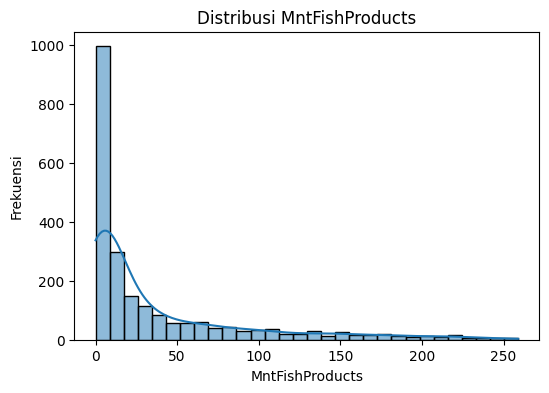

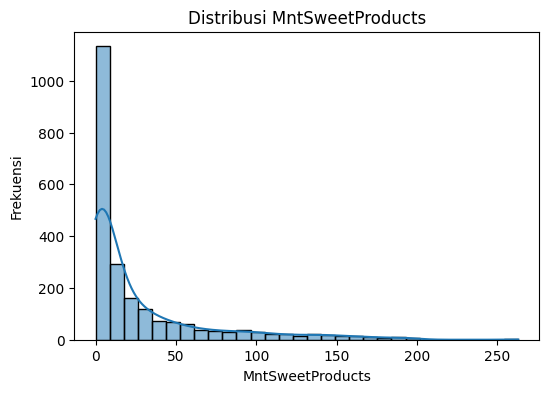

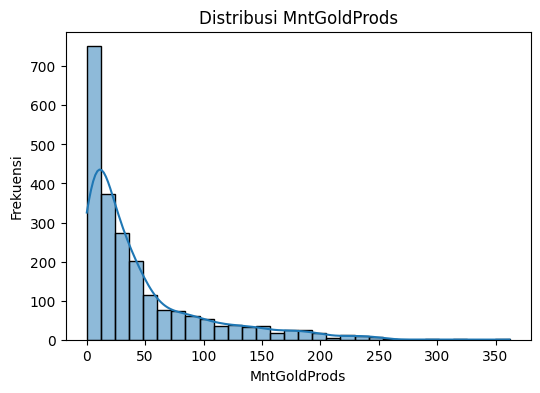

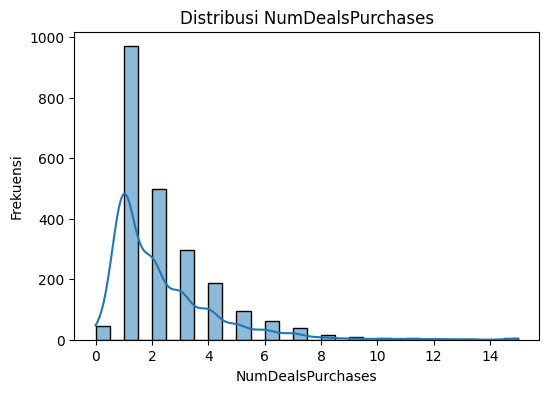

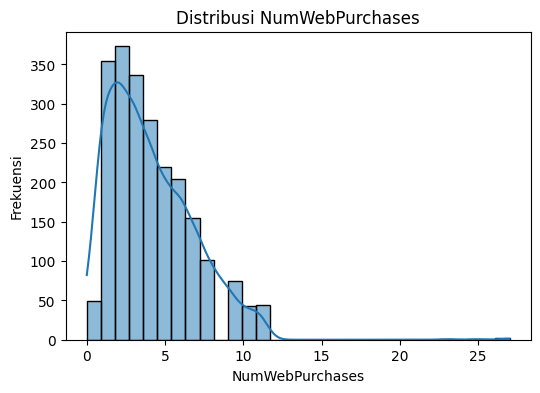

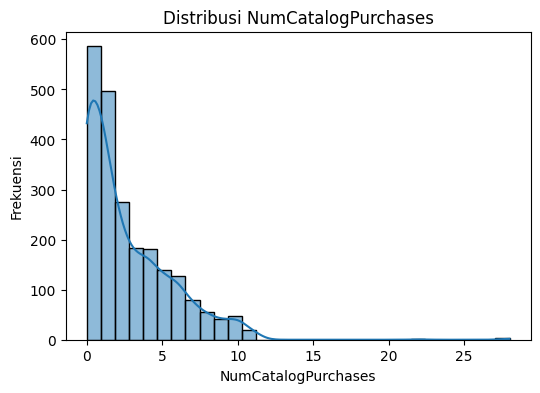

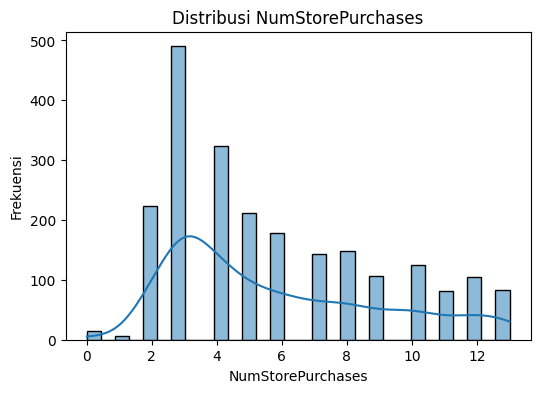

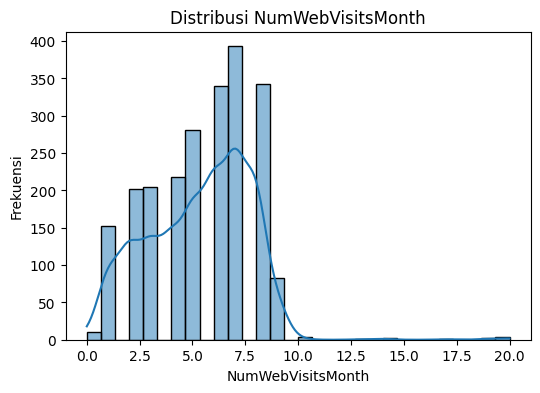

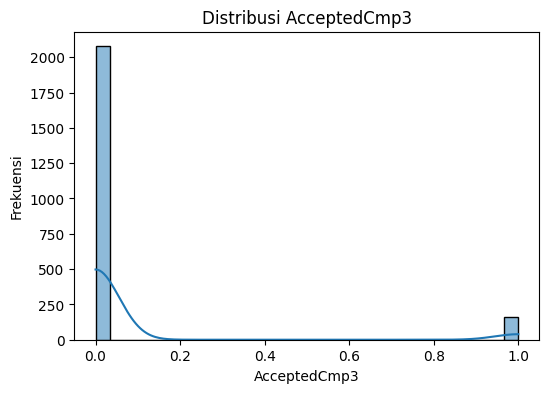

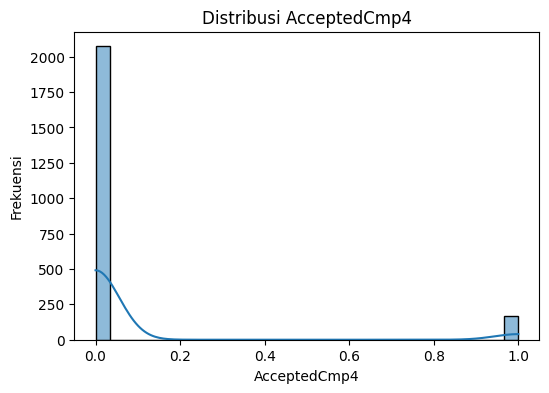

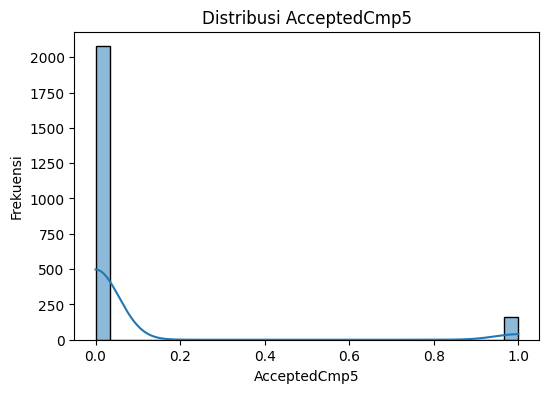

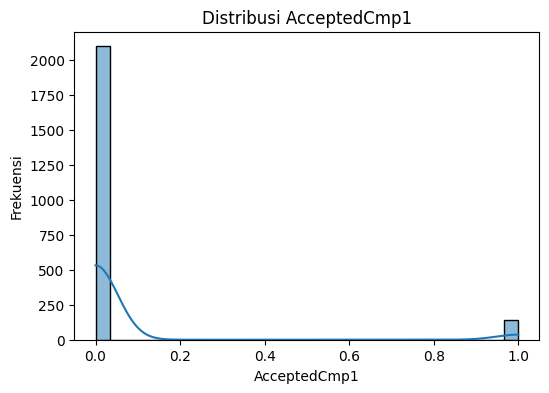

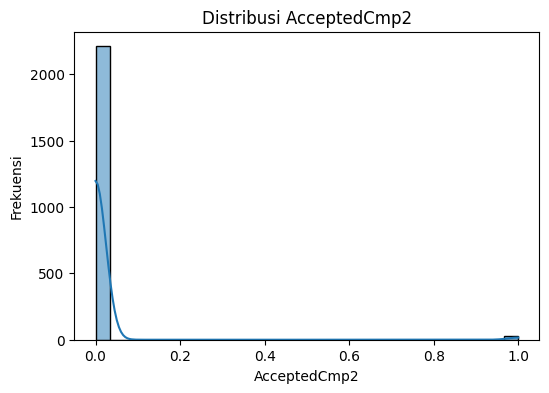

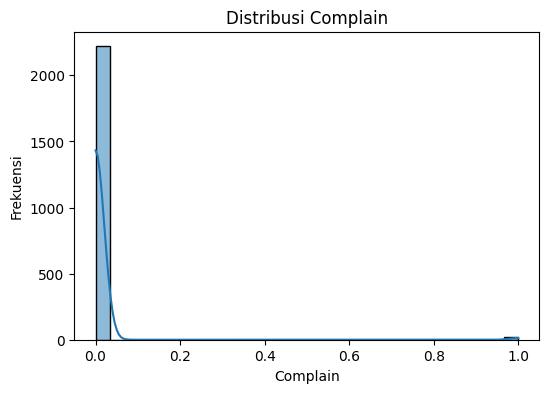

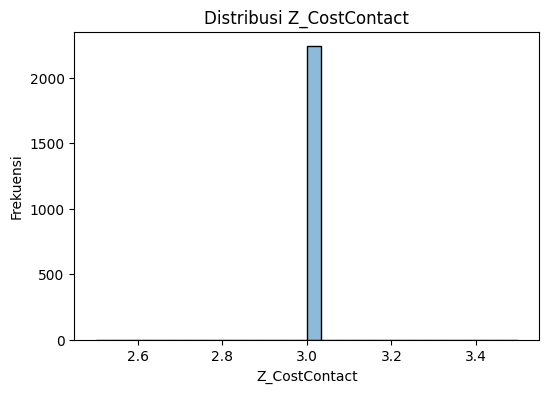

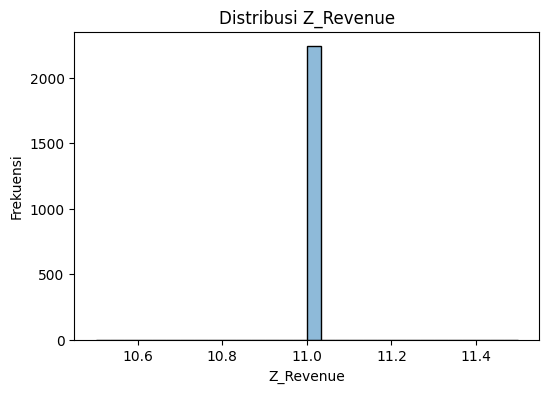

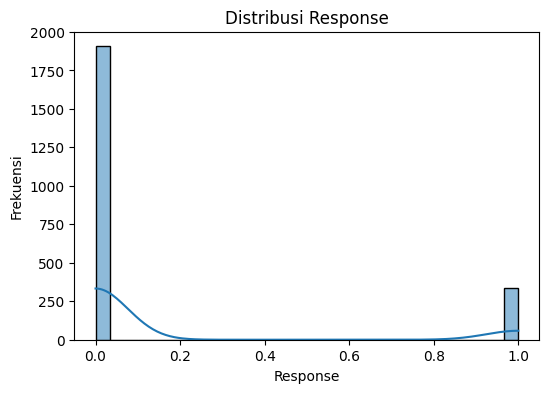

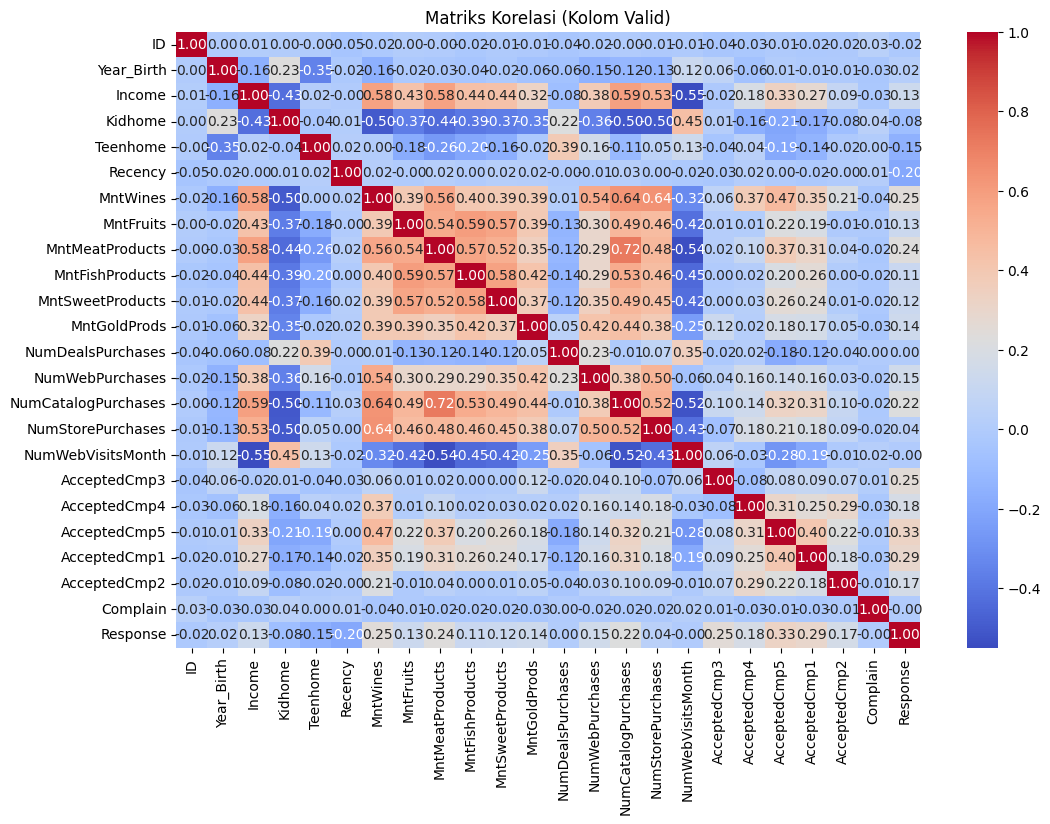

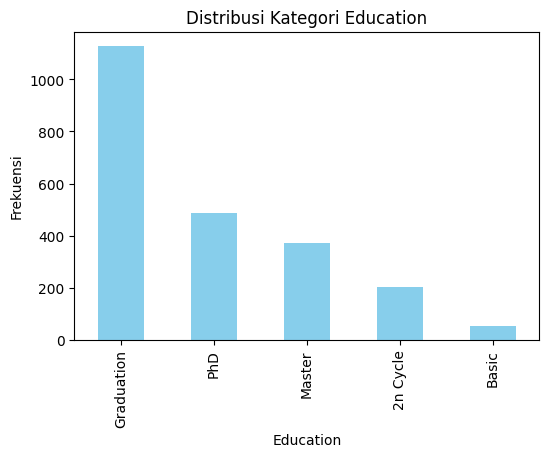

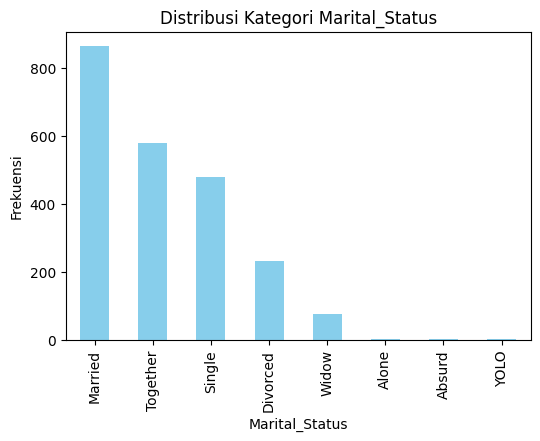


Kolom `Dt_Customer` memiliki terlalu banyak kategori (663). Menampilkan hanya 20 teratas.


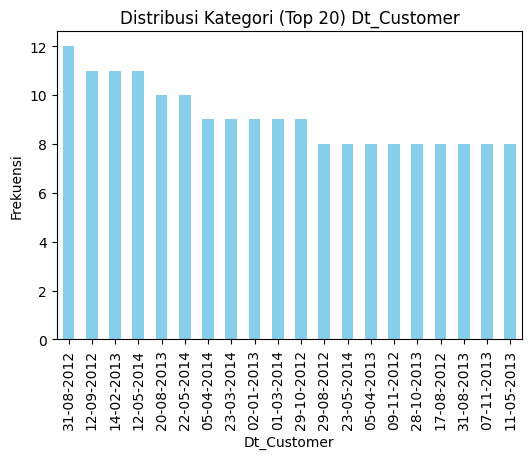

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = 'marketing_campaign.csv'  # Sesuaikan path jika diperlukan
dataset = pd.read_csv(file_path, delimiter='\t')

# Memastikan dataset terbaca dengan benar
print("Beberapa Baris Pertama Dataset:")
print(dataset.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(dataset.info())

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(dataset.shape)
print("\nJenis Data pada Setiap Kolom:")
print(dataset.dtypes)

# 2. Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom:")
missing_values = dataset.isnull().sum()
print(missing_values)

# Mengisi nilai yang hilang pada kolom numerikal dengan mean
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[col] > 0:
        dataset[col].fillna(dataset[col].mean(), inplace=True)

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in dataset.select_dtypes(include=['object']).columns:
    if missing_values[col] > 0:
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(dataset.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi
# Filter kolom numerikal
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hapus kolom yang seluruh nilainya NaN
valid_numerical_cols = dataset[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if dataset[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = dataset[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")

# 4. Visualisasi Data Kategorikal
max_unique_values = 20  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = dataset[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = dataset[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        dataset[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# 1. Menghapus atau Menangani Data Kosong (Sudah ditangani sebelumnya)
print("Jumlah Nilai Kosong Setelah Penanganan:")
print(dataset.isnull().sum())

# 2. Menghapus Data Duplikasi
print("\nJumlah Baris Sebelum Menghapus Duplikasi:", dataset.shape[0])
dataset.drop_duplicates(inplace=True)
print("Jumlah Baris Setelah Menghapus Duplikasi:", dataset.shape[0])

# 3. Normalisasi atau Standarisasi Fitur
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
print("\nData Numerikal Setelah Normalisasi/Standarisasi:")
print(dataset[numerical_cols].head())

# 4. Deteksi dan Penanganan Outlier
# Menggunakan metode IQR (Interquartile Range)
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah Outlier Teridentifikasi:", outliers.sum())
# Menghapus outlier jika diperlukan
dataset = dataset.loc[~outliers]
print("Jumlah Baris Setelah Menghapus Outlier:", dataset.shape[0])

# 5. Encoding Data Kategorikal
categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset.loc[:, col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Simpan encoder untuk interpretasi nanti
print("\nData Kategorikal Setelah Encoding:")
print(dataset[categorical_cols].head())

# 6. Binning (Pengelompokan Data)
# Contoh Binning pada kolom numerikal tertentu (misal, Age setelah normalisasi)
if 'Year_Birth' in dataset.columns:
    dataset.loc[:, 'Age_Group'] = pd.cut(dataset['Year_Birth'], bins=5, labels=['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly'])
    print("\nDistribusi Age Group:")
    print(dataset['Age_Group'].value_counts())

# Menampilkan dataset hasil preprocessing
print("\nDataset Setelah Preprocessing:")
print(dataset.head())


Jumlah Nilai Kosong Setelah Penanganan:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age_Group              0
dtype: int64

Jumlah Baris Sebelum Menghapus Duplikasi: 1207
Jumlah Baris Setelah Menghapus Duplikasi: 1207

Data Numerikal Setelah Normalisasi/Standarisasi:
         ID  Year_Birth  Education  Marital_Status  

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [12]:
from sklearn.cluster import KMeans

# Pilih jumlah cluster awal (misalnya, 3)
n_clusters = 3

# Pilih kolom numerikal untuk clustering
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
clustering_data = dataset[numerical_cols]

# Latih model clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(clustering_data)

print("\nHasil Clustering (Cluster Labels):")
print(dataset['Cluster'].value_counts())



Hasil Clustering (Cluster Labels):
Cluster
1    366
0    276
2    138
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

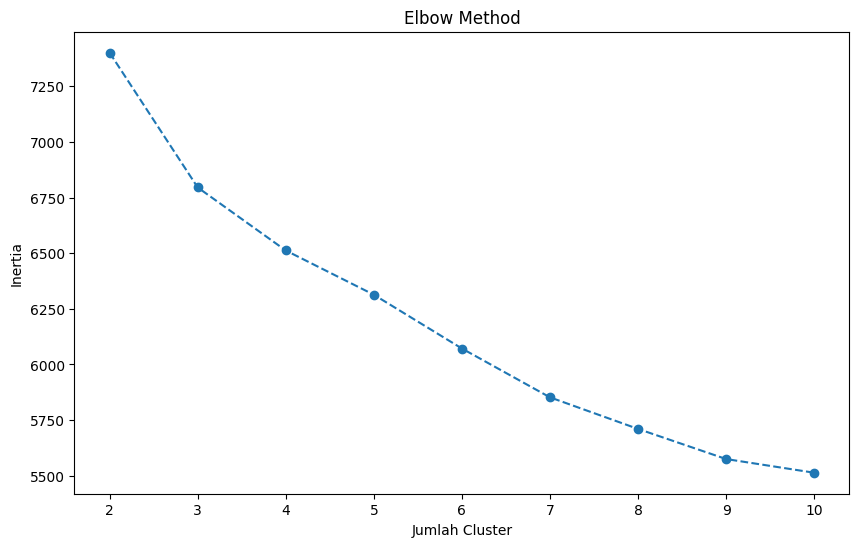

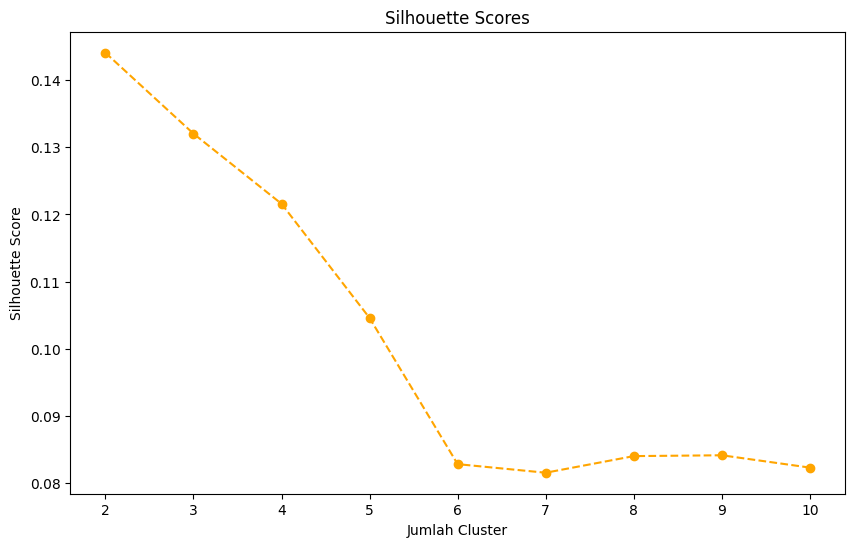


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [13]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)

    # Simpan inertia (sse) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    score = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Pilih jumlah cluster optimal berdasarkan evaluasi
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

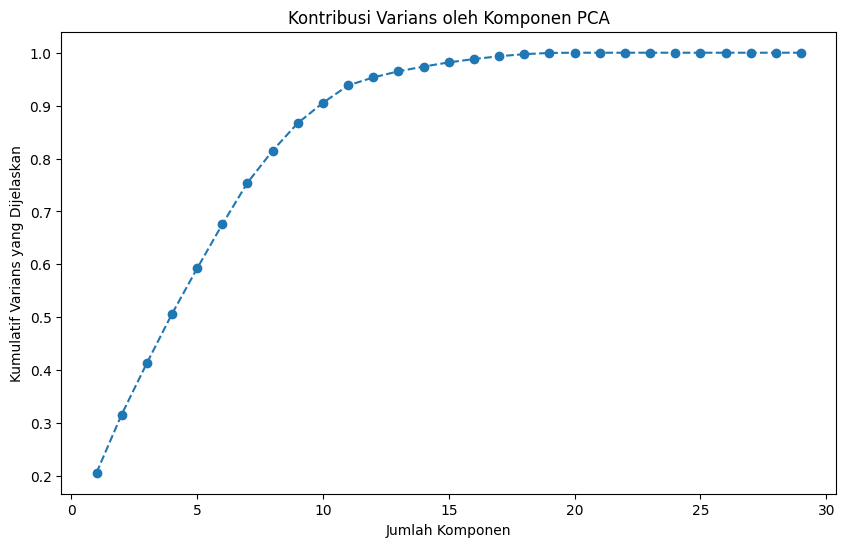

In [14]:
from sklearn.decomposition import PCA

# Lakukan PCA untuk memahami kontribusi fitur
pca = PCA(n_components=len(numerical_cols))
pca_data = pca.fit_transform(clustering_data)

# Plot kontribusi varians setiap komponen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numerical_cols)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Kontribusi Varians oleh Komponen PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.show()


In [15]:
# Pilih jumlah fitur berdasarkan kontribusi varians (misalnya, 95%)
n_components_optimal = sum(pca.explained_variance_ratio_.cumsum() <= 0.95)
print(f"\nJumlah fitur optimal berdasarkan PCA: {n_components_optimal}")

# Transformasi data berdasarkan fitur utama
reduced_data = PCA(n_components=n_components_optimal).fit_transform(clustering_data)



Jumlah fitur optimal berdasarkan PCA: 11



Silhouette Score dengan Feature Selection: 0.1536277456950327
Silhouette Score Tanpa Feature Selection: 0.14407573395789552


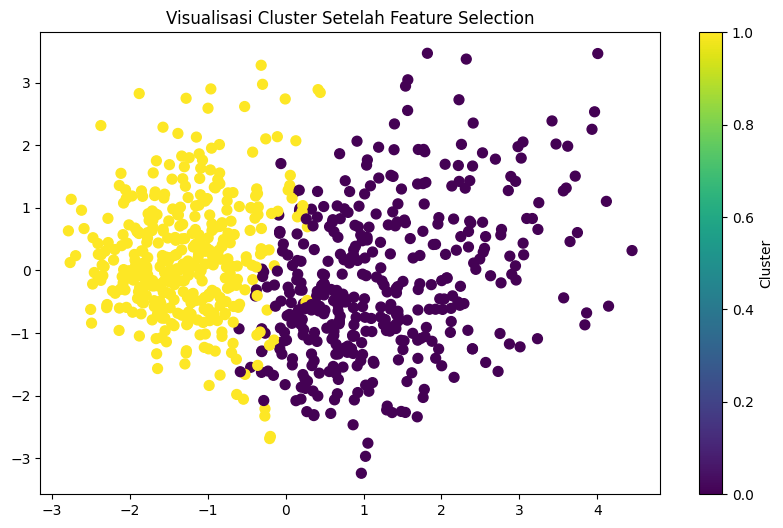

In [16]:
# Model clustering baru dengan data hasil reduksi dimensi
kmeans_reduced = KMeans(n_clusters=2, random_state=42)
cluster_labels_reduced = kmeans_reduced.fit_predict(reduced_data)

# Hitung Silhouette Score untuk data hasil feature selection
silhouette_score_reduced = silhouette_score(reduced_data, cluster_labels_reduced)
print(f"\nSilhouette Score dengan Feature Selection: {silhouette_score_reduced}")

# Bandingkan dengan Silhouette Score sebelumnya
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

# Bandingkan distribusi cluster baru
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels_reduced, cmap='viridis', s=50)
plt.title('Visualisasi Cluster Setelah Feature Selection')
plt.colorbar(label='Cluster')
plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [18]:
print("Kolom dalam Dataset:")
print(dataset.columns)


Kolom dalam Dataset:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age_Group', 'Cluster'],
      dtype='object')


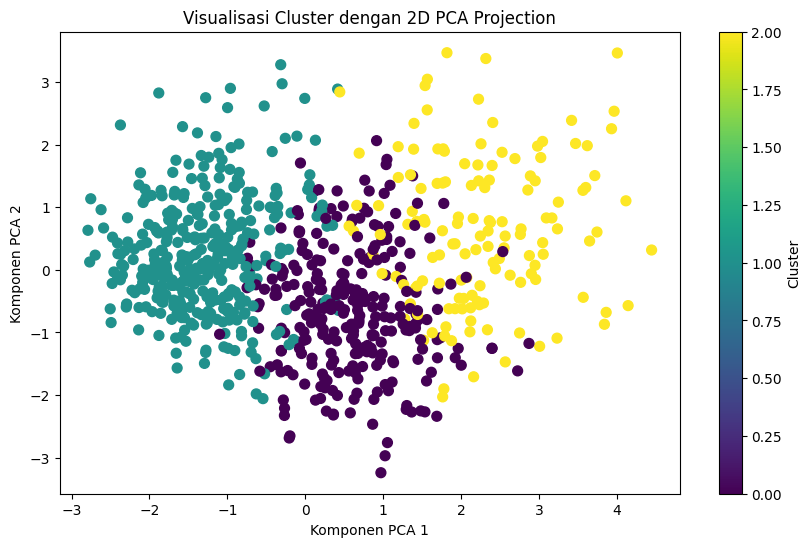

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Gunakan dua komponen utama dari PCA untuk visualisasi
pca = PCA(n_components=2)
pca_data_2d = pca.fit_transform(clustering_data)

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_2d[:, 0], pca_data_2d[:, 1], c=dataset['Cluster'], cmap='viridis', s=50)
plt.title('Visualisasi Cluster dengan 2D PCA Projection')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Statistik Deskriptif untuk Tiap Cluster:
               ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
Cluster                                                                        
0        0.000695   -0.523314   0.298350        0.112612 -0.228836  0.424194   
1       -0.012525    0.726911  -0.014417       -0.078584 -0.786403  0.488721   
2        0.020741   -0.540421   0.355682       -0.105770  0.540000 -0.510477   

         Teenhome  Dt_Customer   Recency  MntWines  ...  NumWebVisitsMonth  \
Cluster                                             ...                      
0        0.816059    -0.035132 -0.029116 -0.528227  ...           0.065964   
1       -1.039598     0.065226  0.025657 -0.572562  ...           0.467237   
2        0.769375     0.046203 -0.093783  0.289612  ...           0.037521   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Cluster                                                                         
0   

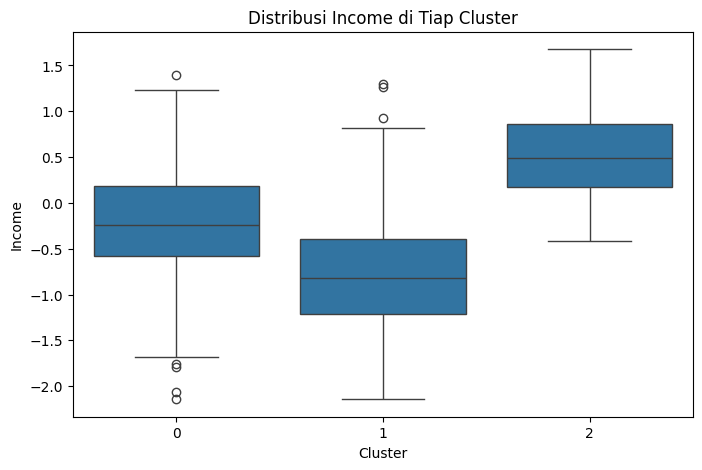

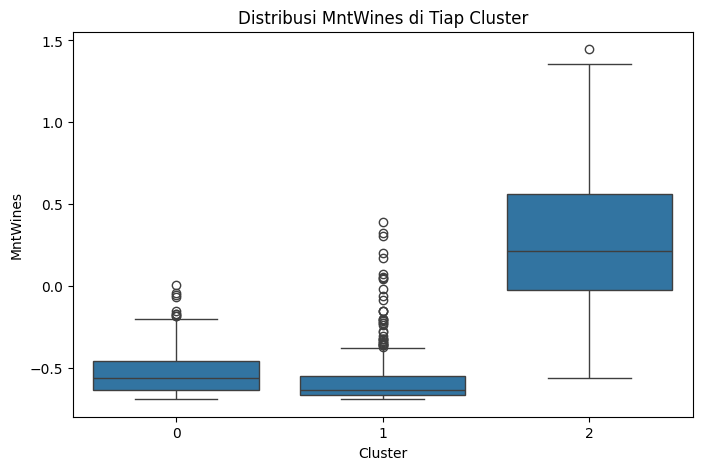

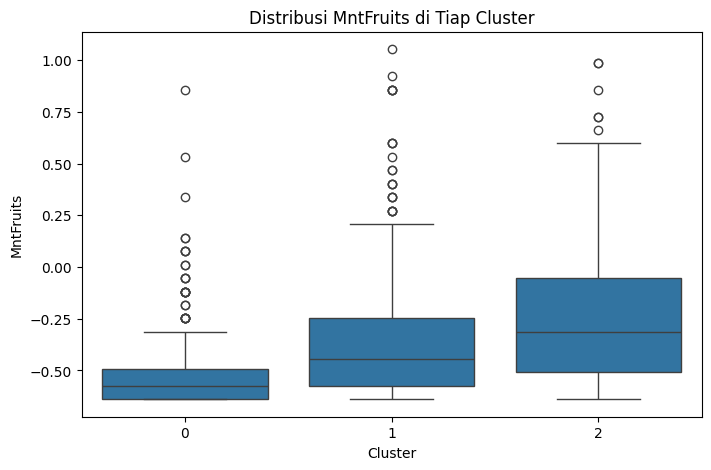

In [21]:
# Pilih hanya kolom numerikal untuk analisis statistik deskriptif
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Analisis statistik deskriptif berdasarkan cluster
cluster_summary = dataset.groupby('Cluster')[numerical_cols].mean()

print("\nStatistik Deskriptif untuk Tiap Cluster:")
print(cluster_summary)

# Lihat distribusi data di setiap cluster untuk beberapa fitur utama
features_to_analyze = ['Income', 'MntWines', 'MntFruits']  # Ganti dengan fitur relevan
for feature in features_to_analyze:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=dataset)
    plt.title(f'Distribusi {feature} di Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


**Berdasarkan hasil statistik deskriptif untuk tiap cluster, kita dapat menganalisis karakteristik masing-masing cluster. Berikut adalah interpretasi yang dapat disusun:**
-----
---------------------------------------------------------
Untuk Cluster 0
-----
1. Karakteristik: Income (Pendapatan): Pendapatan relatif sedang dibandingkan cluster lain (-0.228836).
MntWines (Pembelian Anggur): Konsumsi anggur cukup rendah (-0.528227).
Kidhome (Jumlah Anak di Rumah): Cenderung memiliki anak lebih banyak (0.424194).
Teenhome (Jumlah Remaja di Rumah): Remaja lebih banyak (0.816059).
2. Interpretasi:
Cluster ini kemungkinan besar terdiri dari keluarga dengan anak-anak atau remaja, yang memiliki pengeluaran relatif rendah untuk produk premium seperti anggur.
Strategi Bisnis: Fokuskan penawaran produk yang ramah keluarga atau promosi diskon.

----------------------------------------------------------------------------
Untuk Cluster 1
---
1. Karakteristik:
Income (Pendapatan): Pendapatan relatif rendah (-0.786403).
MntWines (Pembelian Anggur): Konsumsi anggur paling rendah (-0.572562).
Kidhome (Jumlah Anak di Rumah): Cenderung memiliki anak lebih banyak (0.488721).
Teenhome (Jumlah Remaja di Rumah): Remaja lebih sedikit (-1.039598).
2. Interpretasi:
Cluster ini mungkin mewakili pelanggan dengan penghasilan rendah, dengan fokus pada pengeluaran kebutuhan dasar daripada produk mewah seperti anggur.
Strategi Bisnis: Targetkan produk ekonomis atau kebutuhan pokok, dan gunakan strategi pemasaran berbasis harga.

----------------------------------------------------------------------------
Untuk Cluster 2
---
1. Karakteristik:
Income (Pendapatan): Pendapatan relatif tinggi (0.540000).
MntWines (Pembelian Anggur): Konsumsi anggur tertinggi (0.289612).
Kidhome (Jumlah Anak di Rumah): Cenderung memiliki sedikit anak (-0.510477).
Teenhome (Jumlah Remaja di Rumah): Lebih banyak remaja (0.769375).
2. Interpretasi:
Cluster ini terdiri dari pelanggan premium dengan penghasilan tinggi dan konsumsi produk mewah yang lebih besar.
Strategi Bisnis: Fokus pada penawaran eksklusif atau layanan tambahan untuk menarik pelanggan premium ini.

---------------------------------------------------
**Kesimpulan Umum**
-----
Cluster memiliki pola yang dapat diinterpretasikan secara logis berdasarkan pendapatan, pengeluaran, dan karakteristik rumah tangga.
Rekomendasi Strategi Bisnis:
Cluster 0: Produk keluarga dengan harga terjangkau.
Cluster 1: Diskon atau paket ekonomis.
Cluster 2: Produk premium dan layanan eksklusif.









# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [23]:
# Simpan dataset ke dalam file CSV
output_file = 'hasil_clustering_R2.csv'
dataset.to_csv(output_file, index=False)
print(f"Dataset telah berhasil disimpan ke file: {output_file}")


Dataset telah berhasil disimpan ke file: hasil_clustering_R2.csv
